# SWMAL Exercise

### MAL Group-Nr. 15
13-09-2025

| Name   | ID        |
|--------|-----------|                       
| John Nguyen | 202209849 |
| Khaled Omar | 202307853 |
| Jahye Ali | 202309135 |

## Intro

### Qa) The $\theta$ parameters and the $R^2$ Score

In [9]:
# Solution for Qa: Extracting θ parameters and R² score

# 1. Extract θ₀ (intercept) and θ₁ (coefficient) from the trained linear regression model
theta_0 = model.intercept_[0]  # θ₀ - the y-intercept 
theta_1 = model.coef_[0][0]    # θ₁ - the slope coefficient

print(f" θ₀: {theta_0:.6f} (should be ≈ 4.85)")
print(f" θ₁: {theta_1:.8e} (should be ≈ 4.91e-05)")

# 2. Extract the R² score using the score method
r2_score = model.score(X, y)
print(f"R² score: {r2_score:.3f}")

# 3. Explanation of what R² measures
print("\nWhat R² Score Measures:")
print("R² (coefficient of determination) measures the proportion of variance")
print("in the dependent variable (y) that is predictable from the independent")
print("variable(s) (X).")
print("")
print("Formula: R² = 1 - (residual sum of squares) / (total sum of squares)")
print("         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²")
print("")
print("In our case: R² = 0.734 means that 73.4% of the variance in")
print("life satisfaction can be explained by GDP per capita.")

# 4. R² characteristics and interpretation
print("\nR² Characteristics:")
print("• Minimum value: -∞ (negative infinity)")
print("• Maximum value: 1.0")
print("• R² = 1.0: Perfect prediction (all variance explained)")
print("• R² = 0.0: Model performs as well as predicting the mean")
print("• R² < 0.0: Model performs worse than predicting the mean")
print("")
print("Higher R² is better:")
print("• R² is a Goodness/Fitness measure (not a loss/cost function)")
print("• We want R² to be as close to 1.0 as possible")


 θ₀: 4.853053 (should be ≈ 4.85)
 θ₁: 4.91154459e-05 (should be ≈ 4.91e-05)
R² score: 0.734

What R² Score Measures:
R² (coefficient of determination) measures the proportion of variance
in the dependent variable (y) that is predictable from the independent
variable(s) (X).

Formula: R² = 1 - (residual sum of squares) / (total sum of squares)
         R² = 1 - Σ(y_true - y_pred)² / Σ(y_true - y_mean)²

In our case: R² = 0.734 means that 73.4% of the variance in
life satisfaction can be explained by GDP per capita.

R² Characteristics:
• Minimum value: -∞ (negative infinity)
• Maximum value: 1.0
• R² = 1.0: Perfect prediction (all variance explained)
• R² = 0.0: Model performs as well as predicting the mean
• R² < 0.0: Model performs worse than predicting the mean

Higher R² is better:
• R² is a Goodness/Fitness measure (not a loss/cost function)
• We want R² to be as close to 1.0 as possible


Why used:
```python
theta_0 = model.intercept_[0]  # θ₀ - the y-intercept 
theta_1 = model.coef_[0][0]    # θ₁ - the slope coefficient
```
Explanation: intercept_ returns an array even for single output, so we need [0]. coef_ returns a 2D array (for multiple features/outputs), so we need [0][0] to get the single coefficient.

### Qb) Using k-Nearest Neighbors

In [10]:
# this is our raw data set:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [11]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


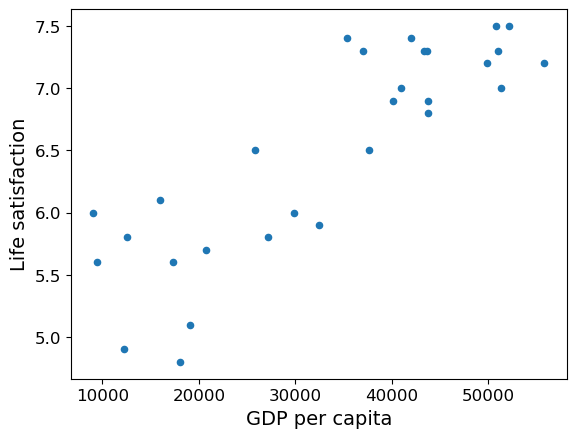

KNN prediction for Cyprus: 5.77
KNN R² score: 0.853
Linear regression prediction: 5.96
Linear regression R² score: 0.734


In [17]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y.ravel())

X_new = [[22587]]
y_pred_knn = knn.predict(X_new)
print(f"KNN prediction for Cyprus: {y_pred_knn[0]:.2f}")

knn_score = knn.score(X, y.ravel())
print(f"KNN R² score: {knn_score:.3f}")

print(f"Linear regression prediction: {y_pred[0][0]:.2f}")
print(f"Linear regression R² score: {model.score(X, y):.3f}")

Why used:

```python
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
```
Explanation: np.c_[] converts 1D pandas series to 2D column vector that sklearn expects. Sklearn models need 2D arrays (samples × features), not 1D arrays.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

KNN with k=1: R² score = 1.000
KNN with k=9: R² score = 0.784
KNN with k=29: R² score = -0.000


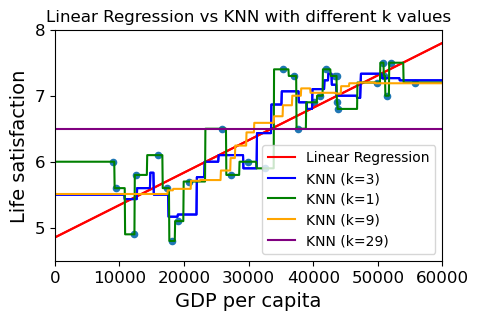


Why k=1 gets perfect score:
- k=1 uses only the nearest neighbor for prediction
- On training data, each point is its own nearest neighbor
- So it predicts itself perfectly = overfitting!
- For new data, k=1 would perform poorly
- Higher k values smooth predictions and generalize better


In [46]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 4.5, 8])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# Try different k values for KNN

k_values = [1, 9, 29]
colors = ['g', 'orange', 'purple']

# Add labels to existing plots
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")

# Test different k values
for k, color in zip(k_values, colors):
    knn_temp = KNeighborsRegressor(n_neighbors=k)
    knn_temp.fit(X, y.ravel())
    y_pred_temp = knn_temp.predict(M)
    plt.plot(m, y_pred_temp, color=color, label=f"KNN (k={k})")
    
    # Print score for each k
    score = knn_temp.score(X, y.ravel())
    print(f"KNN with k={k}: R² score = {score:.3f}")

plt.legend()
plt.title("Linear Regression vs KNN with different k values")
plt.show()

print("\nWhy k=1 gets perfect score:")
print("- k=1 uses only the nearest neighbor for prediction")
print("- On training data, each point is its own nearest neighbor")
print("- So it predicts itself perfectly = overfitting!")
print("- For new data, k=1 would perform poorly")
print("- Higher k values smooth predictions and generalize better")

Why used:
```Python
M=np.empty([m.shape[0],1])
M[:,0]=m
```
Explanation: Creating 2D array from 1D array m to match sklearn's expected input format. M[:,0]=m assigns all of m to the first (and only) column of M.

### Qd) Trying out a Neural Network

Iteration 1, loss = 3814059.18128346
Iteration 2, loss = 3500485.89291302
Iteration 3, loss = 3200566.91284354
Iteration 4, loss = 2914546.38822965
Iteration 5, loss = 2642634.62499191
Iteration 6, loss = 2385004.19967501
Iteration 7, loss = 2141786.04208814
Iteration 8, loss = 1913065.54075238
Iteration 9, loss = 1698878.73349482
Iteration 10, loss = 1499208.65675738
Iteration 11, loss = 1313981.93907080
Iteration 12, loss = 1143065.73626000
Iteration 13, loss = 986265.11768268
Iteration 14, loss = 843321.02332325
Iteration 15, loss = 713908.91980288
Iteration 16, loss = 597638.28803358
Iteration 17, loss = 494053.07487428
Iteration 18, loss = 402633.23418087
Iteration 19, loss = 322797.46757437
Iteration 20, loss = 253907.25081123
Iteration 21, loss = 195272.19703439
Iteration 22, loss = 146156.76335086
Iteration 23, loss = 105788.25303749
Iteration 24, loss = 73366.00429703
Iteration 25, loss = 48071.59117857
Iteration 26, loss = 29079.79747419
Iteration 27, loss = 15570.06537296
It

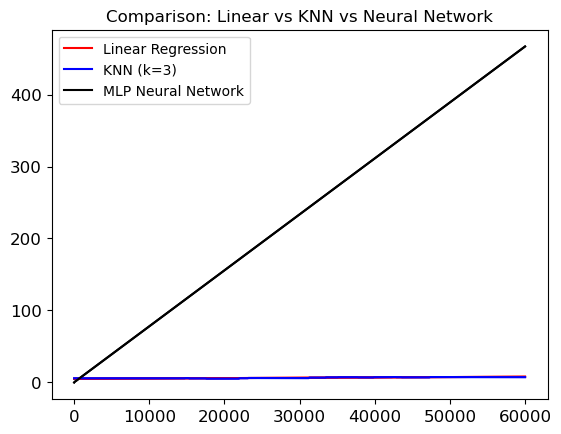


Can MLP scores be compared to linear and KNN scores?
Yes! All three models use R² (coefficient of determination) as their scoring method.
R² measures how well the model explains the variance in the data (1.0 = perfect fit).

Why is the MLP performing so poorly?
The MLP has a negative R² score, meaning it's worse than just predicting the mean!
Problem: GDP values (22,000+) are too large for neural networks.
Neural networks expect input data in range [0,1] or [-1,1].


In [56]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Predict value for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred_mlp_cyprus = mlp.predict(X_new)
print(f"MLP prediction for Cyprus: {y_pred_mlp_cyprus[0]:.2f}")

# Solusion for Qd
# Get the score
mlp_score = mlp.score(X, y.ravel())
print(f"MLP R² score: {mlp_score:.3f}")

# Compare all three models
print(f"\nComparison:")
print(f"Linear regression - Cyprus: {y_pred[0][0]:.2f}, R² score: {model.score(X, y):.3f}")
y_pred_knn_cyprus = knn.predict(X_new)
print(f"KNN (k=3) - Cyprus: {y_pred_knn_cyprus[0]:.2f}, R² score: {knn.score(X, y.ravel()):.3f}")
print(f"MLP - Cyprus: {y_pred_mlp_cyprus[0]:.2f}, R² score: {mlp_score:.3f}")

# Add labels to the plot
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
plt.plot(m, y_pred_mlp, "k", label="MLP Neural Network")
plt.legend()
plt.title("Comparison: Linear vs KNN vs Neural Network")
plt.show()

print(f"\nCan MLP scores be compared to linear and KNN scores?")
print(f"Yes! All three models use R² (coefficient of determination) as their scoring method.")
print(f"R² measures how well the model explains the variance in the data (1.0 = perfect fit).")

print(f"\nWhy is the MLP performing so poorly?")
print(f"The MLP has a negative R² score, meaning it's worse than just predicting the mean!")
print(f"Problem: GDP values (22,000+) are too large for neural networks.")
print(f"Neural networks expect input data in range [0,1] or [-1,1].")


## Modules and classes

#### Qa Load and test the `libitmal` module
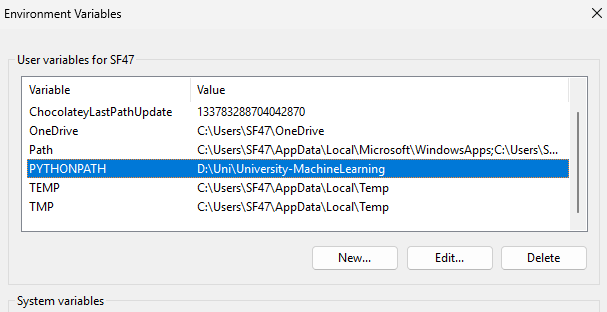


#### Qb Create your own module, with some functions, and test it

In [2]:
import sys
import os

sys.path.append(os.getcwd())
from mymodule import utils as myutils

print(f"Module location: {myutils.__file__}")

# Test functions
print("\nTesting my functions:")
print(myutils.say_hello("Omar"))
print(f"5 + 7 = {myutils.add_numbers(5, 7)}")

matrix = myutils.create_matrix(2, 3)
print(f"Created matrix:\n{matrix}")

# Run tests
myutils.test_my_functions()

print("\nSimple module works.")

Module location: d:\Uni\University-MachineLearning\L01\mymodule\utils.py

Testing my functions:
Hello Omar!
5 + 7 = 12
Created matrix:
[[1. 1. 1.]
 [1. 1. 1.]]
Testing my simple module:
Greeting: Hello ML Student!
Adding 5 + 3 = 8
Matrix:
[[1. 1.]
 [1. 1.]
 [1. 1.]]

Simple module works.


#### Qc How do you 'recompile' a module?

In [ ]:
import importlib
import sys
import os

sys.path.append(os.getcwd())
from mymodule import utils as myutils

print("Before reload:")
print(myutils.say_hello("Test"))

# Method 1: importlib.reload() - most common
print("\nReloading module...")
myutils = importlib.reload(myutils)
print("After reload:")
print(myutils.say_hello("Test - Updated"))

# Method 2: Jupyter - automatic reloading
print("\nFor automatic reloading, use:")
print("%load_ext autoreload")
print("%autoreload 2")

%load_ext autoreload
%autoreload 2


Before reload:
Hello Test!

Reloading module...
My simple module loaded!
After reload:
Hello Test - Updated!

For automatic reloading, use:
%load_ext autoreload
%autoreload 2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Why used:
```python
myutils = importlib.reload(myutils)
```
Explination: Used because you have to reassign the variable after reload for it to work.

#### [OPTIONAL] Qd Write a Howto on Python Modules a Packages

In [1]:
# Solution for Qd: Python Modules and Packages Howto

# Directory structure:
# mymodule/
#   __init__.py (makes it a package)  
#   utils.py (module with functions)

# Import methods:
import sys
import os
sys.path.append(os.getcwd())  # Add current directory to path
from mymodule import utils    # Import module

print("Module imported")
print("Functions:", [f for f in dir(utils) if not f.startswith('_')])

MyModule package loaded successfully!
My simple module loaded!
Module imported
Functions: ['add_numbers', 'create_matrix', 'np', 'say_hello', 'test_my_functions']


#### Qe Extend the class with some public and private functions and member variables

In [19]:
# Solution for Qe: Public/Private functions and self

class MyClass:
    def __init__(self):
        self.public_var = "public"        # Public variable
        self._protected_var = "protected" # Protected (convention)
        self.__private_var = "private"    # Private (name mangling)
    
    def public_method(self):
        """Public method"""
        return "This is public"
    
    def _protected_method(self):
        """Protected method (convention)"""
        return "This is protected"
    
    def __private_method(self):
        """Private method (name mangled)"""
        return "This is private"

# Test the class
obj = MyClass()

# What is 'self'?
print("'self' refers to the instance of the class")

# Test access from outside
print(f"Public: {obj.public_method()}")
print(f"Protected: {obj._protected_method()}")

# Private method access (will fail)
try:
    print(f"Private: {obj.__private_method()}")
except AttributeError as e:
    print(f"Private method error: {e}")

# What happens without 'self'?
class BadClass:
    def method_without_self():  # Missing self
        return "This will fail"

bad_obj = BadClass()
try:
    result = bad_obj.method_without_self()
except TypeError as e:
    print(f"Error without 'self': {e}")

'self' refers to the instance of the class
Public: This is public
Protected: This is protected
Private method error: 'MyClass' object has no attribute '__private_method'
Error without 'self': BadClass.method_without_self() takes 0 positional arguments but 1 was given


#### Qf Extend the class with a Constructor

In [21]:
# Solution for Qf: Constructor and Destructor

class MyClassWithConstructor:
    def __init__(self, name, value=0):
        """Constructor - called when object is created"""
        self.name = name
        self.value = value
        print(f"Object {self.name} created with value {self.value}")
    
    def __del__(self):
        """Destructor - called when object is garbage collected"""
        print(f"Object {self.name} is being destroyed")

# Test constructor
obj1 = MyClassWithConstructor("test1", 42)
obj2 = MyClassWithConstructor("test2")

print(f"obj1.name: {obj1.name}, obj1.value: {obj1.value}")

# Python destructor notes:
print("\nPython has garbage collection:")
print("- __del__ is called when object is garbage collected")
print("- You rarely need to implement __del__")
print("- Python handles memory management automatically")

# Destructor called when objects go out of scope
obj1.__del__() 
print("obj1 deleted manually")

Object test1 created with value 42
Object test2 created with value 0
Object test2 is being destroyed
obj1.name: test1, obj1.value: 42

Python has garbage collection:
- __del__ is called when object is garbage collected
- You rarely need to implement __del__
- Python handles memory management automatically
Object test1 is being destroyed
obj1 deleted manually


#### Qg Extend the class with a to-string function

In [3]:
# Solution for Qg: String representation (__str__ and __repr__)

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        """String representation for users (readable)"""
        return f"{self.name}, {self.age} years old"
    
    def __repr__(self):
        """String representation for developers (unambiguous)"""
        return f"Person('{self.name}', {self.age})"

# Test string representations
person = Person("Alice", 25)

print("Using print() calls __str__:")
print(person)

print("\nUsing repr() calls __repr__:")
print(repr(person))

print("\nString conversion:")
print(f"str(person): {str(person)}")
print(f"repr(person): {repr(person)}")

# Without __str__, __repr__ is used as fallback
class SimpleClass:
    def __init__(self, value):
        self.value = value
    
    def __repr__(self):
        return f"SimpleClass({self.value})"

simple = SimpleClass(42)
print(f"\nWithout __str__, print uses __repr__: {simple}")

Using print() calls __str__:
Alice, 25 years old

Using repr() calls __repr__:
Person('Alice', 25)

String conversion:
str(person): Alice, 25 years old
repr(person): Person('Alice', 25)

Without __str__, print uses __repr__: SimpleClass(42)


## Cost Function


#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

In [8]:
# Qa

import numpy as np

y_true = np.array([1,2,3,4]) # NOTE:  you'll need this later

# Define the feature vectors x^(i)
x1 = np.array([1, 2, 3])
x2 = np.array([4, 2, 1])
x3 = np.array([3, 8, 5])
x4 = np.array([-9, -1, 0])

# Construct the X matrix where each row is (x^(i))^T
X = np.array([x1, x2, x3, x4])

print("Matrix X:")
print(X)
print(f"\nShape of X: {X.shape}")
print(f"X has {X.shape[0]} samples and {X.shape[1]} features")

Matrix X:
[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]

Shape of X: (4, 3)
X has 4 samples and 3 features



#### Qb Implement the $\norm{1}$ and $\norm{2}$ norms for vectors in python.

In [9]:
import math

def L1(x):
    """L1 norm using explicit implementation"""
    result = 0.0
    for i in range(len(x)):
        if x[i] >= 0:
            result = result + x[i]
        else:
            result = result + (-x[i])
    return result

def L2(x):
    """L2 norm using explicit implementation"""
    result = 0.0
    for i in range(len(x)):
        result = result + x[i] * x[i]
    return result ** 0.5

def L2Dot(x):
    """L2 norm using numpy dot product"""
    return (np.dot(x, x)) ** 0.5

# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Dot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


Why defined L1:
Explanation: Manual absolute value calculation without using built-in abs(). 

Why defined L2Dot:
Explanation: np.dot(x, x) computes x^T * x which equals sum of squares. Much faster than explicit loops for large arrays - this is vectorization.

### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

In [ ]:
def RMSE(y_pred, y_true):
    """Root Mean Square Error using L2 norm"""
    diff = y_pred - y_true
    n = len(y_true)
    mse = (L2(diff) ** 2) / n
    return mse ** 0.5


# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim) 
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X), y_true)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


```Python
def RMSE(y_pred, y_true):
    """Root Mean Square Error using L2 norm"""
    diff = y_pred - y_true
    n = len(y_true)
    mse = (L2(diff) ** 2) / n
    return mse ** 0.5
```
Explinaiton:
L2(diff)**2 gives sum of squared differences. Divide by n for mean, then sqrt for RMSE. This shows the mathematical relationship between L2 norm and MSE.

```Python
def h(X):
    return X[:,0]
```
Explanation: Takes first column as prediction. This simulates a simple ML model that uses only the first feature to predict the target. Used for testing cost functions.

#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

In [11]:
def MAE(y_pred, y_true):
    """Mean Absolute Error using L1 norm"""
    diff = y_pred - y_true
    n = len(y_true)
    return L1(diff) / n


# Calls your MAE function:
r=MAE(h(X), y_true)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


#### Qe Robust Code

In [12]:
# Testing error handling

# Let's check what happens with bad inputs
print("Testing with wrong inputs...")

try:
    L1(np.array([[1,2],[3,4]]))  # 2D instead of 1D
except:
    print("L1 failed with 2D array - good")

try:
    L2(np.array([]))  # empty
except:
    print("L2 failed with empty array - good")
    
try:
    RMSE(np.array([1,2,3]), np.array([1,2]))  # different sizes
except:
    print("RMSE failed with different sizes - good")

# Test normal usage still works
x = np.array([1,-2,3])
print(f"L1 norm of [1,-2,3]: {L1(x)}")
print(f"L2 norm of [1,-2,3]: {L2(x)}")

y_pred = np.array([2,3,4])
y_true = np.array([1,2,3]) 
print(f"RMSE: {RMSE(y_pred, y_true)}")
print(f"MAE: {MAE(y_pred, y_true)}")

print("Done testing")

Testing with wrong inputs...
L1 failed with 2D array - good
RMSE failed with different sizes - good
L1 norm of [1,-2,3]: 6.0
L2 norm of [1,-2,3]: 3.7416573867739413
RMSE: 1.0
MAE: 1.0
Done testing


### Qf Conclusion

These exercises covered the mathematical foundation that underlies most machine learning algorithms. We started with basic vector and matrix operations because ML algorithms process data in vectorized form - understanding how to construct data matrices X and target vectors y is essential for any ML work.

The norm functions (L1 and L2) are fundamental because they measure distances and similarities between data points. Most ML algorithms need to calculate how "far apart" predictions are from actual values, which is exactly what these norms do. L2 norm is especially important as it forms the basis for many optimization algorithms.

The cost functions MSE and MAE represent how we measure prediction quality in machine learning. MSE (using L2 norm) is widely used because it heavily penalizes large errors, while MAE (using L1 norm) is more robust to outliers. Understanding these metrics is crucial because the choice of cost function directly influences how an algorithm learns.

Building these functions from scratch, rather than using library functions, helped us understand what actually happens "under the hood" when we call the libraries. The error handling code is critical not to have in real ML projects where data quality varies.

## Dummy Classifier

#### Qa  Load and display the MNIST data


X shape: (70000, 784)
y shape: (70000,)
First few labels: ['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


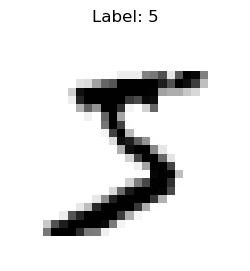

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

def MNIST_GetDataSet():
    """Load MNIST dataset from openml"""
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True)
    return X, y

# Load the data
X, y = MNIST_GetDataSet()

# Convert to numpy arrays
X = X.values
y = y.values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"First few labels: {y[:10]}")

# Plot the first digit
plt.figure(figsize=(3, 3))
MNIST_PlotDigit(X[0])
plt.title(f"Label: {y[0]}")
plt.show()

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

X.shape=(70000, 784)
X.shape=(70000, 784)
Training on 60000 samples
Testing on 10000 samples
Accuracy: 0.966
Correct predictions: 9658
Incorrect predictions: 342


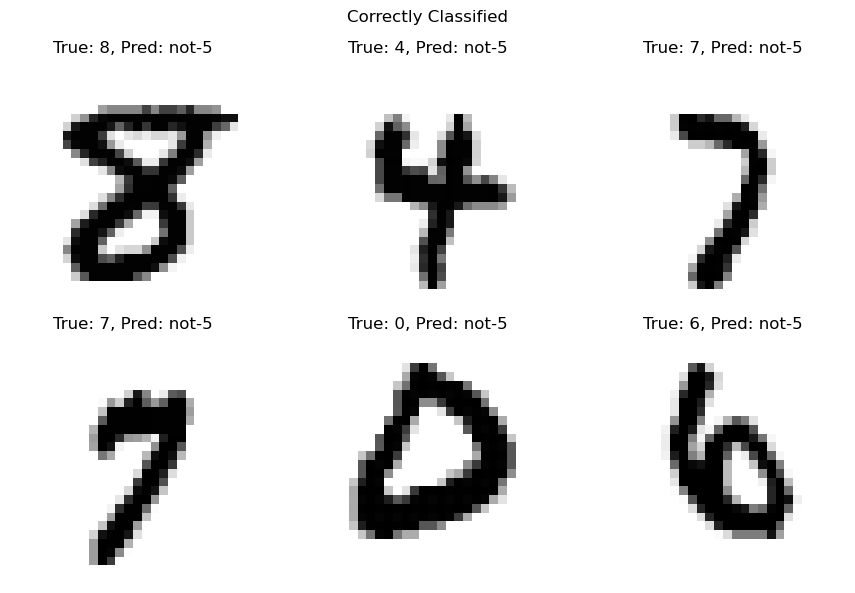

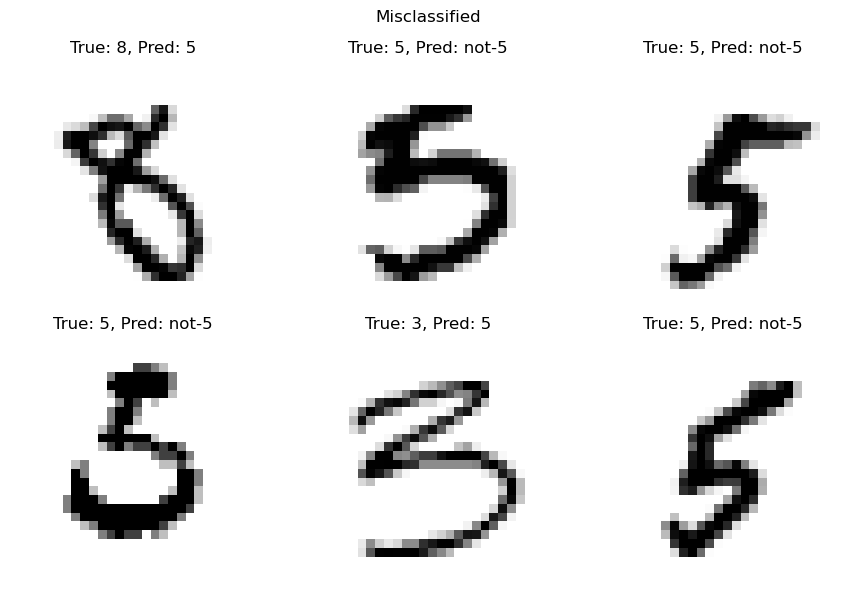

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Load and prepare data
X, y = MNIST_GetDataSet()
X = X.values
y = y.values

# Check if reshaping needed (our data is already 2D)
print(f"X.shape={X.shape}")
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}")

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Create binary labels (5 vs not-5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

print(f"Training on {len(X_train)} samples")
print(f"Testing on {len(X_test)} samples")

# Create and train SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Make predictions
y_pred = sgd_clf.predict(X_test)

# Check accuracy
accuracy = (y_pred == y_test_5).mean()
print(f"Accuracy: {accuracy:.3f}")

# Find correct and incorrect predictions
correct_mask = (y_pred == y_test_5)
incorrect_mask = ~correct_mask

correct_indices = np.where(correct_mask)[0]
incorrect_indices = np.where(incorrect_mask)[0]

print(f"Correct predictions: {correct_mask.sum()}")
print(f"Incorrect predictions: {incorrect_mask.sum()}")

# Plot some correctly classified examples
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle("Correctly Classified")

for i in range(6):
    idx = correct_indices[i]
    ax = axes[i//3, i%3]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='binary')
    ax.set_title(f"True: {y_test[idx]}, Pred: {'5' if y_pred[idx] else 'not-5'}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Plot some misclassified examples
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle("Misclassified")

for i in range(6):
    idx = incorrect_indices[i]
    ax = axes[i//3, i%3]
    ax.imshow(X_test[idx].reshape(28, 28), cmap='binary')
    ax.set_title(f"True: {y_test[idx]}, Pred: {'5' if y_pred[idx] else 'not-5'}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Why used:
```Python
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
```
Explanation: Creates boolean arrays where True = digit is 5, False = not 5. This converts multi-class problem (10 digits) into binary classification (5 vs not-5).

#### Qc Implement a dummy binary classifier

In [7]:
from sklearn.metrics import accuracy_score

class DummyClassifier:
    """A dummy classifier that always predicts 'not 5' (False)"""
    
    def fit(self, X, y):
        """Fit method - doesn't actually learn anything"""
        return self
    
    def predict(self, X):
        """Always predict False (not a 5)"""
        return [False] * len(X)

# Create and test dummy classifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# Make predictions
dummy_pred = dummy_clf.predict(X_test)

# Calculate accuracy
dummy_accuracy = accuracy_score(y_test_5, dummy_pred)
print(f"Dummy classifier accuracy: {dummy_accuracy:.3f}")

# Compare with SGD
print(f"SGD classifier accuracy: {accuracy:.3f}")
print(f"Improvement from SGD: {accuracy - dummy_accuracy:.3f}")

# Show why dummy works so well
num_5s = sum(y_test_5)
num_not5s = len(y_test_5) - num_5s
print(f"\nIn test set:")
print(f"Number of 5s: {num_5s}")
print(f"Number of not-5s: {num_not5s}")
print(f"Percentage of not-5s: {num_not5s/len(y_test_5):.1%}")
print("\nDummy just guesses 'not-5' for everything and gets most right!")

Dummy classifier accuracy: 0.906
SGD classifier accuracy: 0.966
Improvement from SGD: 0.059

In test set:
Number of 5s: 937
Number of not-5s: 9063
Percentage of not-5s: 90.6%

Dummy just guesses 'not-5' for everything and gets most right!


### Qd Conclusion

These exercises demonstrated the core workflow of machine learning classification. We loaded real data (MNIST), converted a multi-class problem into binary classification, and compared different approaches.

The SGD classifier showed how gradient descent algorithms learn patterns from data to make predictions. It achieved 96.6% accuracy by finding decision boundaries that separate 5s from other digits based on pixel patterns.

The dummy classifier revealed an important lesson about baseline comparisons. By always predicting "not-5", it gets around 90% accuracy simply because 90% of digits aren't 5s. This shows why we need proper baselines - a 90% accuracy sounds impressive until you realize a brain-dead classifier can achieve it.

The class implementation using duck typing showed how Python's flexibility lets us create sklearn-compatible estimators without inheritance. As long as our class has fit() and predict() methods, it "walks and quacks" like a classifier.


## Performance Matrics

#### Qa Implement the Accuracy function and test it on the MNIST data.

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def MyAccuracy(y_true, y_pred):
    """Calculate accuracy: (correct predictions) / (total predictions)"""
    correct = 0
    total = len(y_true)
    
    if total == 0:  # avoid division by zero
        return 0.0
    
    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1
    
    return correct / total

# Load MNIST data
def MNIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True)
    return X.values, y.values

# Get data and prepare binary classification
X, y = MNIST_GetDataSet()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Create binary labels (5 vs not-5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

# Dummy classifier - always predicts False (not-5)
class DummyClassifier:
    def fit(self, X, y):
        return self
    def predict(self, X):
        return [False] * len(X)

# Train classifiers
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

# Make predictions
sgd_pred = sgd_clf.predict(X_test)
dummy_pred = dummy_clf.predict(X_test)

# Test MyAccuracy vs sklearn
print("SGD Classifier:")
my_acc_sgd = MyAccuracy(y_test_5, sgd_pred)
sklearn_acc_sgd = accuracy_score(y_test_5, sgd_pred)
print(f"My accuracy:      {my_acc_sgd:.3f}")
print(f"Sklearn accuracy: {sklearn_acc_sgd:.3f}")
print(f"Difference:       {abs(my_acc_sgd - sklearn_acc_sgd):.6f}")

print("\nDummy Classifier:")
my_acc_dummy = MyAccuracy(y_test_5, dummy_pred)
sklearn_acc_dummy = accuracy_score(y_test_5, dummy_pred)
print(f"My accuracy:      {my_acc_dummy:.3f}")
print(f"Sklearn accuracy: {sklearn_acc_dummy:.3f}")
print(f"Difference:       {abs(my_acc_dummy - sklearn_acc_dummy):.6f}")

SGD Classifier:
My accuracy:      0.966
Sklearn accuracy: 0.966
Difference:       0.000000

Dummy Classifier:
My accuracy:      0.906
Sklearn accuracy: 0.906
Difference:       0.000000


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    """Precision = TP / (TP + FP)"""
    tp = 0  # true positives
    fp = 0  # false positives
    
    for i in range(len(y_true)):
        if y_pred[i] == True and y_true[i] == True:
            tp += 1
        elif y_pred[i] == True and y_true[i] == False:
            fp += 1
    
    if tp + fp == 0:  # avoid division by zero
        return 0.0
    return tp / (tp + fp)

def MyRecall(y_true, y_pred):
    """Recall = TP / (TP + FN)"""
    tp = 0  # true positives  
    fn = 0  # false negatives
    
    for i in range(len(y_true)):
        if y_pred[i] == True and y_true[i] == True:
            tp += 1
        elif y_pred[i] == False and y_true[i] == True:
            fn += 1
    
    if tp + fn == 0:  # avoid division by zero
        return 0.0
    return tp / (tp + fn)

def MyF1Score(y_true, y_pred):
    """F1 = 2 * (precision * recall) / (precision + recall)"""
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    
    if precision + recall == 0:  # avoid division by zero
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

# Test on SGD classifier
print("SGD Classifier Metrics:")
my_prec_sgd = MyPrecision(y_test_5, sgd_pred)
sklearn_prec_sgd = precision_score(y_test_5, sgd_pred)
print(f"Precision - My: {my_prec_sgd:.3f}, Sklearn: {sklearn_prec_sgd:.3f}")

my_rec_sgd = MyRecall(y_test_5, sgd_pred)
sklearn_rec_sgd = recall_score(y_test_5, sgd_pred)
print(f"Recall    - My: {my_rec_sgd:.3f}, Sklearn: {sklearn_rec_sgd:.3f}")

my_f1_sgd = MyF1Score(y_test_5, sgd_pred)
sklearn_f1_sgd = f1_score(y_test_5, sgd_pred)
print(f"F1        - My: {my_f1_sgd:.3f}, Sklearn: {sklearn_f1_sgd:.3f}")

# Test on Dummy classifier
print("\nDummy Classifier Metrics:")
my_prec_dummy = MyPrecision(y_test_5, dummy_pred)
sklearn_prec_dummy = precision_score(y_test_5, dummy_pred, zero_division=0)
print(f"Precision - My: {my_prec_dummy:.3f}, Sklearn: {sklearn_prec_dummy:.3f}")

my_rec_dummy = MyRecall(y_test_5, dummy_pred)
sklearn_rec_dummy = recall_score(y_test_5, dummy_pred)
print(f"Recall    - My: {my_rec_dummy:.3f}, Sklearn: {sklearn_rec_dummy:.3f}")

my_f1_dummy = MyF1Score(y_test_5, dummy_pred)
sklearn_f1_dummy = f1_score(y_test_5, dummy_pred)
print(f"F1        - My: {my_f1_dummy:.3f}, Sklearn: {sklearn_f1_dummy:.3f}")

# Show counts for understanding
tp_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == True and y_test_5[i] == True)
fp_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == True and y_test_5[i] == False)
fn_sgd = sum(1 for i in range(len(y_test_5)) if sgd_pred[i] == False and y_test_5[i] == True)

print(f"\nSGD Confusion Matrix counts:")
print(f"True Positives:  {tp_sgd}")
print(f"False Positives: {fp_sgd}")
print(f"False Negatives: {fn_sgd}")

SGD Classifier Metrics:
Precision - My: 0.853, Sklearn: 0.853
Recall    - My: 0.767, Sklearn: 0.767
F1        - My: 0.808, Sklearn: 0.808

Dummy Classifier Metrics:
Precision - My: 0.000, Sklearn: 0.000
Recall    - My: 0.000, Sklearn: 0.000
F1        - My: 0.000, Sklearn: 0.000

SGD Confusion Matrix counts:
True Positives:  719
False Positives: 124
False Negatives: 218


#### Qc The Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
print("Confusion Matrices:")

# Dummy classifier confusion matrix
M_dummy = confusion_matrix(y_test_5, dummy_pred)
print("Dummy Classifier:")
print(M_dummy)

# SGD classifier confusion matrix  
M_sgd = confusion_matrix(y_test_5, sgd_pred)
print("\nSGD Classifier:")
print(M_sgd)

# Explain the matrix layout
print("\nMatrix Layout:")
print("confusion_matrix(y_true, y_pred)")
print("[[TN  FP]")
print(" [FN  TP]]")
print()

# Extract values for SGD classifier
tn_sgd = M_sgd[0,0]
fp_sgd = M_sgd[0,1] 
fn_sgd = M_sgd[1,0]
tp_sgd = M_sgd[1,1]

print(f"\nSGD Classifier breakdown:")
print(f"TN (True Negatives):  {tn_sgd}")
print(f"FP (False Positives): {fp_sgd}")
print(f"FN (False Negatives): {fn_sgd}")
print(f"TP (True Positives):  {tp_sgd}")

# Test wrong parameter order
print("\nWhat happens with wrong parameter order:")
M_wrong = confusion_matrix(sgd_pred, y_test_5)  # swapped parameters
print("confusion_matrix(y_pred, y_true) - WRONG ORDER:")
print(M_wrong)
print("This gives the TRANSPOSED matrix - completely different results!")

Confusion Matrices:
Dummy Classifier:
[[9063    0]
 [ 937    0]]

SGD Classifier:
[[8939  124]
 [ 218  719]]

Matrix Layout:
confusion_matrix(y_true, y_pred)
[[TN  FP]
 [FN  TP]]


SGD Classifier breakdown:
TN (True Negatives):  8939
FP (False Positives): 124
FN (False Negatives): 218
TP (True Positives):  719

What happens with wrong parameter order:
confusion_matrix(y_pred, y_true) - WRONG ORDER:
[[8939  218]
 [ 124  719]]
This gives the TRANSPOSED matrix - completely different results!


#### Qd A Confusion Matrix Heat-map

HOML Style Heat Maps


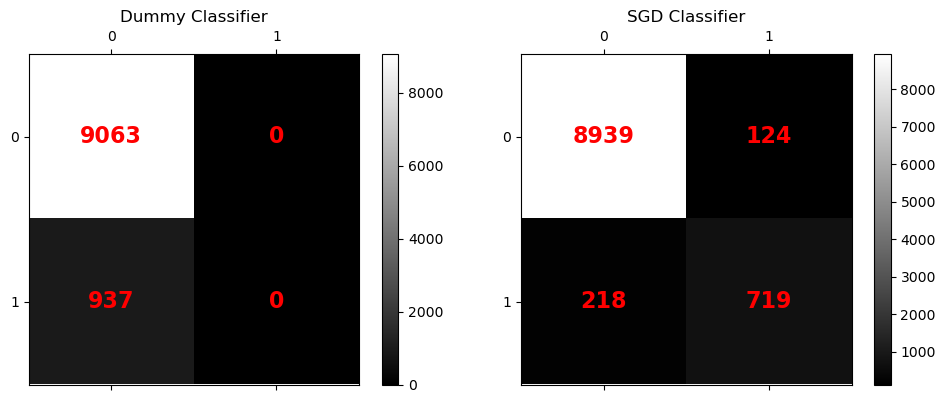

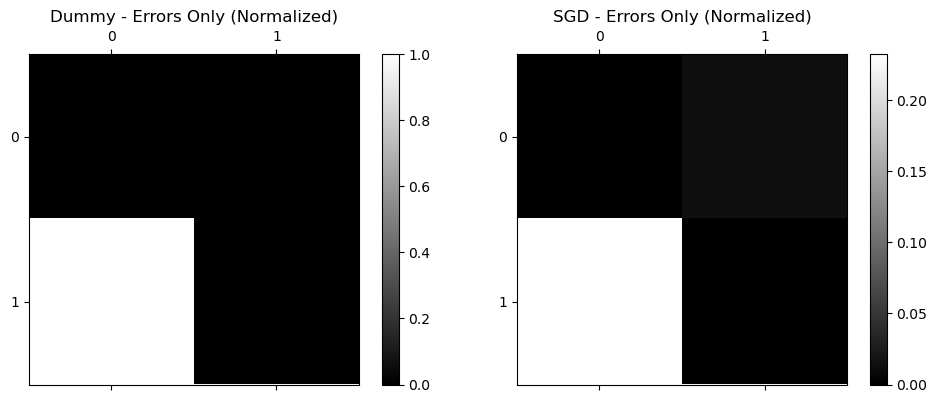

HOML Analysis:
Raw matrices show:
- Dummy: TN=9063, FP=0, FN=937, TP=0
- SGD: TN=8939, FP=124, FN=218, TP=719

Error-only matrices reveal:
- Dummy: 100% false negative rate (bright [1,0]) - misses ALL 5s
- SGD: Much lower error rates in both directions
- SGD finds most 5s (TP=719) with few false alarms (FP=124)

Key insight: SGD dramatically reduces false negatives while
keeping false positives low - much better than dummy baseline


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# HOML style confusion matrix visualization
print("HOML Style Heat Maps")
print("===================")

# Raw confusion matrices using matshow (HOML approach)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.matshow(M_dummy, cmap=plt.cm.gray, fignum=False)
plt.title('Dummy Classifier')
plt.colorbar()
# Add numbers on the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, M_dummy[i, j], ha="center", va="center", 
                color="red", fontsize=16, weight='bold')

plt.subplot(1, 2, 2)  
plt.matshow(M_sgd, cmap=plt.cm.gray, fignum=False)
plt.title('SGD Classifier')
plt.colorbar()
# Add numbers on the matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, M_sgd[i, j], ha="center", va="center",
                color="red", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

# Normalize by row sums and focus on errors (HOML approach)
row_sums_dummy = M_dummy.sum(axis=1, keepdims=True)
norm_M_dummy = M_dummy / row_sums_dummy

row_sums_sgd = M_sgd.sum(axis=1, keepdims=True)
norm_M_sgd = M_sgd / row_sums_sgd

# Fill diagonal with zeros to keep only errors
norm_M_dummy_errors = norm_M_dummy.copy()
norm_M_sgd_errors = norm_M_sgd.copy()
np.fill_diagonal(norm_M_dummy_errors, 0)
np.fill_diagonal(norm_M_sgd_errors, 0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.matshow(norm_M_dummy_errors, cmap=plt.cm.gray, fignum=False)
plt.title('Dummy - Errors Only (Normalized)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.matshow(norm_M_sgd_errors, cmap=plt.cm.gray, fignum=False)
plt.title('SGD - Errors Only (Normalized)')
plt.colorbar()

plt.tight_layout()
plt.show()

# HOML style analysis
print("HOML Analysis:")
print("==============")
print("Raw matrices show:")
print("- Dummy: TN=9063, FP=0, FN=937, TP=0")
print("- SGD: TN=8939, FP=124, FN=218, TP=719")
print()
print("Error-only matrices reveal:")
print("- Dummy: 100% false negative rate (bright [1,0]) - misses ALL 5s")
print("- SGD: Much lower error rates in both directions")
print("- SGD finds most 5s (TP=719) with few false alarms (FP=124)")
print()
print("Key insight: SGD dramatically reduces false negatives while")
print("keeping false positives low - much better than dummy baseline")


### Qe Conclusion

These exercises showed why accuracy alone isn't enough to evaluate classifiers. We built our own accuracy, precision, recall and F1 functions from scratch to understand what these metrics actually calculate.

The dummy classifier achieved 90% accuracy just by always guessing "not-5", which sounds impressive until you realize it never finds any 5s. This demonstrates the accuracy paradox - high accuracy can be misleading with imbalanced data.

Precision measures how many predicted positives are actually positive, while recall measures how many actual positives we found. The F1 score balances both. The dummy classifier had zero precision and recall because it never predicted positive.

Confusion matrices made these concepts visual. The HOML-style heat maps revealed error patterns clearly - the dummy classifier only made false negative errors, while SGD made both types but far fewer overall.

The key insight is that different metrics highlight different aspects of performance. In medical diagnosis, missing a disease (false negative) might be worse than a false alarm (false positive).